In [1]:
import numpy as np
# from helpers import get_dff_fat
# from constants_v1 import *
# Plotting
import pandas as pd
from helpers_pd import *
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns
sns.set()
# plt.style.use('seaborn-white')
import matplotlib.pyplot as plt

In [15]:
df1 = get_data(gen="Gen1")

In [16]:
df2 = get_data(gen="Gen2")

In [18]:
df = pd.concat([df1, df2])
# df['K_d'] = df.loc[:, 'k_oc'] * df.loc[:,'f_oc']

In [19]:
# list(df)

In [20]:
# For later, 'KGE-d13C_out', 'NSE-d13C_out'
dfs = df[['Model', 
          'z3_factor',
          'cZ0Z1',
          'cZ',
          'c_adr',
          'k_g',
          'gamma01',
          'gammaZ',
          'f_transp',
          'f_oc',
          'k_oc',
          'beta_runoff',
          'dt_50_aged',
          'dt_50_ab',
          'dt_50_ref',
          'epsilon_iso',
          'beta_moisture',
          'KGE-CONC-tra', 'KGE-d13C-tra',
          'KGE-Q_out', 'KGE-CONC_out', 'KGE-d13C_out',
          'MAE-CONC_out', 
          'NSE-CONC_out', 'NSE-Q_out',
          'BIAS-CONC_out',
          'BIAS-LDS_out',
          'BIAS-Q_out'
          ]]

In [21]:
print( dfs['KGE-CONC_out'].max(), dfs['KGE-Q_out' ].max())
print( dfs['NSE-CONC_out'].max(), dfs['NSE-Q_out' ].max())
# dfs['NSE-Q_out'].max()
# 
# dfs['BIAS-CONC_out'].min()
# dfs['BIAS-LDS_out'].min()

(0.36008130938978367, 0.7856671938254698)
(0.1647141433072119, 0.5624784847441313)


In [29]:
# ff_out = dfs.loc[(dfs['KGE-Q_out'] > 0.6)] # & (dfs['KGE-LDS_out'] > 0) ]
ff_out = dfs.loc[(dfs['NSE-Q_out'] > 0.52)] # & (dfs['KGE-LDS_out'] > 0) ]

# ff_out = dfs.loc[(dfs['KGE-CONC_out'] > 0)] # & (dfs['KGE-LDS_out'] > 0) ]
# ff_out = dfs.loc[(dfs['NSE-Q_out'] > 0.54)] # & (dfs['KGE-LDS_out'] > 0) ]
# ff_out = dfs
print(len(ff_out))

820


In [30]:
ff_out.head()

,Model,z3_factor,cZ0Z1,cZ,c_adr,k_g,gamma01,gammaZ,f_transp,f_oc,...,KGE-d13C-tra,KGE-Q_out,KGE-CONC_out,KGE-d13C_out,MAE-CONC_out,NSE-CONC_out,NSE-Q_out,BIAS-CONC_out,BIAS-LDS_out,BIAS-Q_out
LHS_be1fix3/43/,fix,0.902071,0.782737,0.510113,0.562665,2412.520951,0.727739,0.320903,0.725442,0.031138,...,0.511165,0.735042,-0.500800,0.272174,1.964468,-0.251584,0.524113,-95.749816,-85.785287,-3.905128
LHS_be1fix3/99/,fix,0.925353,0.623276,0.036133,0.243590,1844.096166,0.708111,0.197653,0.572312,0.034462,...,0.234224,0.750052,-0.365483,-0.088065,1.928585,-0.153004,0.537151,-86.110880,-53.996672,6.929544
LHS_be1fix7/16/,fix,0.893974,0.993876,0.582574,0.420681,1986.332228,0.848926,0.061332,0.706202,0.015385,...,0.143765,0.731967,-0.850553,-1.237660,4.039918,-4.872283,0.527155,81.200997,543.780860,11.664484
LHS_be1fix7/30/,fix,0.891414,0.849779,0.628277,0.529952,3073.928502,0.554196,0.008160,0.687685,0.030047,...,-1.346626,0.754104,0.147300,-0.913989,2.248246,-0.280380,0.528816,-43.987913,84.537909,4.176426
LHS_be1fix7/4/,fix,0.988560,0.867056,0.412491,0.351946,3346.209981,0.813269,0.031632,0.582296,0.038674,...,0.713479,0.716865,-0.406901,-0.921256,1.924744,-0.174499,0.531342,-88.663892,-66.930719,-17.121289


In [31]:
ff_out['IsoOut'] = ff_out.apply(IsoKGEout, args=(0.2,), axis=1)

In [32]:
dm_simp = pd.melt(ff_out, 
                 id_vars=['KGE-Q_out', 'NSE-Q_out', 'Model', 'IsoOut'],
             value_vars=['z3_factor',
                         'cZ0Z1',
                         'cZ',
                         'c_adr',
                         'k_g',
                         'gamma01',
                         'gammaZ',
                         'f_transp',
                         'f_oc',
                         'k_oc',
                         'beta_runoff',
                         'dt_50_aged',
                         'dt_50_ab',
                         'dt_50_ref',
                         'epsilon_iso',
                         'beta_moisture'])

In [33]:
dm_simp.head()

,KGE-Q_out,NSE-Q_out,Model,IsoOut,variable,value
0,0.735042,0.524113,fix,KGE-d13C > 0.2,z3_factor,0.902071
1,0.750052,0.537151,fix,KGE-d13C < 0.2,z3_factor,0.925353
2,0.731967,0.527155,fix,KGE-d13C < 0.2,z3_factor,0.893974
3,0.754104,0.528816,fix,KGE-d13C < 0.2,z3_factor,0.891414
4,0.716865,0.531342,fix,KGE-d13C < 0.2,z3_factor,0.988560


## Outlet, fix vs. var

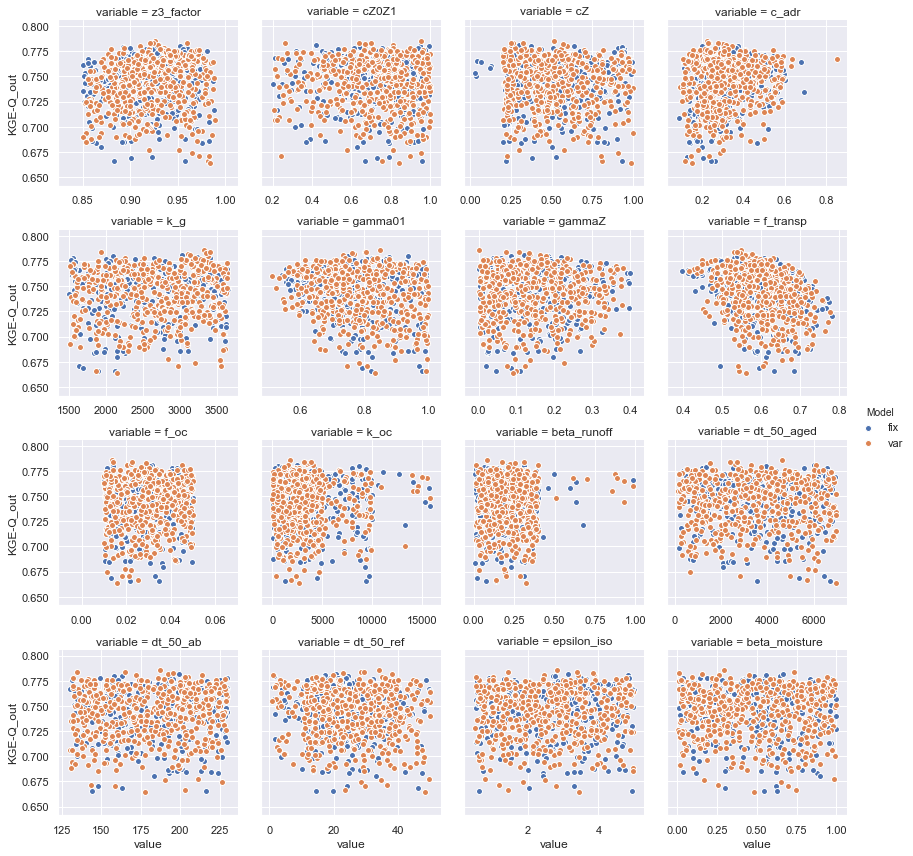

In [34]:
g = sns.FacetGrid(dm_simp, col="variable", hue="Model", col_wrap=4, sharex=False)
g = g.map(plt.scatter, "value", 'KGE-Q_out', edgecolor="w").add_legend()

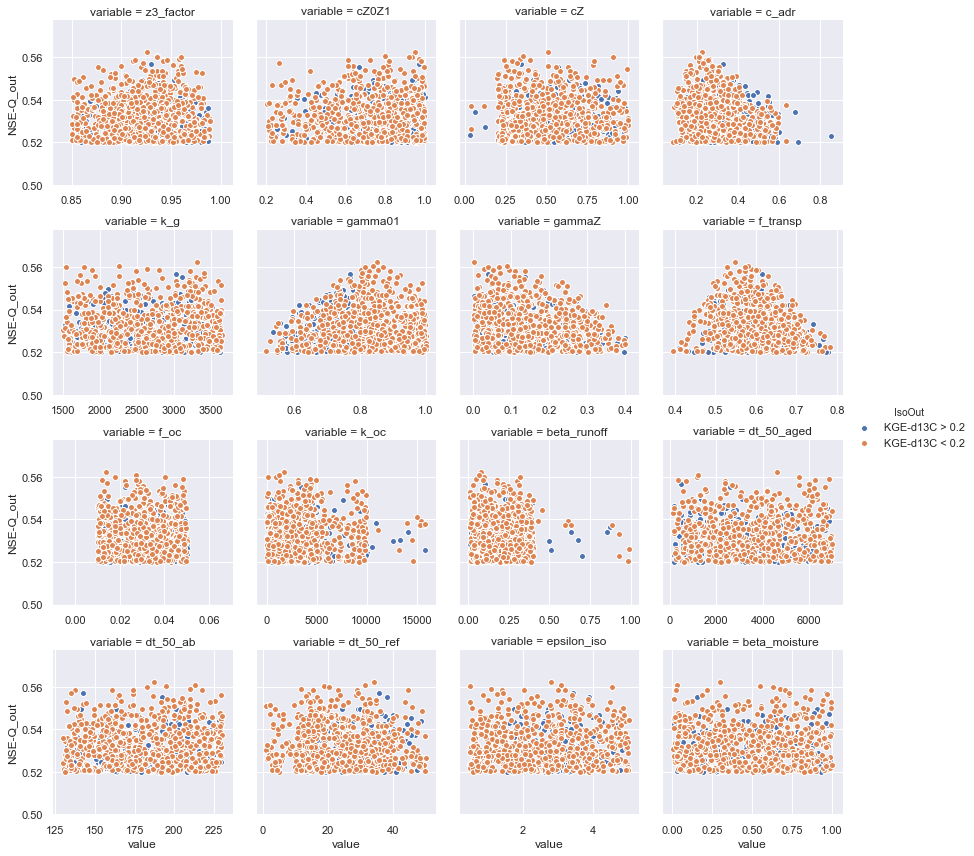

In [35]:
g = sns.FacetGrid(dm_simp, col="variable", hue="IsoOut", col_wrap=4, sharex=False)
g = g.map(plt.scatter, "value", 'NSE-Q_out', edgecolor="w").add_legend()